In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.ticker as ticker
import seaborn as sns
import re






In [2]:
# useful links https://github.com/jleaniz/misc/blob/master/timeilne_analysis.ipynb

#filename = 'baserd01-filesystem-timeline.csv'
filename = 'base-rd-01-supertimeline.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
0,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
1,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[129 / 0x0081] Strings: ['\Microsoft\Windows\W...,[129 / 0x0081] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
2,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[100 / 0x0064] Strings: ['\Microsoft\Windows\W...,[100 / 0x0064] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
3,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[200 / 0x00c8] Strings: ['\Microsoft\Windows\W...,[200 / 0x00c8] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
4,08/23/2018,00:01:13,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[140 / 0x008c] Strings: ['\Microsoft\Windows\W...,[140 / 0x008c] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...


In [4]:
print(df.columns)




Index(['date', 'time', 'timezone', 'MACB', 'source', 'sourcetype', 'type',
       'user', 'host', 'short', 'desc', 'version', 'filename', 'inode',
       'notes', 'format', 'extra'],
      dtype='object')


In [5]:
df.head()

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
0,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
1,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[129 / 0x0081] Strings: ['\Microsoft\Windows\W...,[129 / 0x0081] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
2,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[100 / 0x0064] Strings: ['\Microsoft\Windows\W...,[100 / 0x0064] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
3,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[200 / 0x00c8] Strings: ['\Microsoft\Windows\W...,[200 / 0x00c8] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
4,08/23/2018,00:01:13,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[140 / 0x008c] Strings: ['\Microsoft\Windows\W...,[140 / 0x008c] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...


In [6]:
df.tail()

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
185161,09/06/2018,23:58:34,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[1223 / 0x04c7] Strings: ['BND' '3' 'CON\QOS...,[1223 / 0x04c7] Source Name: Microsoft-Windows...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: a677ac5be58f722...
185162,09/06/2018,23:58:34,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[1267 / 0x04f3] Strings: ['BND' '3' 'CON\QOS...,[1267 / 0x04f3] Source Name: Microsoft-Windows...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: a677ac5be58f722...
185163,09/06/2018,23:59:03,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[145 / 0x0091] Strings: ['Enumeration' 'http:...,[145 / 0x0091] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: 6807dc60332085a...
185164,09/06/2018,23:59:03,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[132 / 0x0084] Strings: ['Enumeration'],[132 / 0x0084] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: 6807dc60332085a...
185165,09/06/2018,23:59:15,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[5857 / 0x16e1] Strings: ['WmiPerfInst' '0x00...,[5857 / 0x16e1] Source Name: Microsoft-Windows...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: 14f3fb53ec0b7de...


In [7]:
df.columns

Index(['date', 'time', 'timezone', 'MACB', 'source', 'sourcetype', 'type',
       'user', 'host', 'short', 'desc', 'version', 'filename', 'inode',
       'notes', 'format', 'extra'],
      dtype='object')

In [8]:
df['date'].unique()

array(['08/23/2018', '08/24/2018', '08/25/2018', '08/26/2018',
       '08/27/2018', '08/28/2018', '08/29/2018', '08/30/2018',
       '08/31/2018', '09/01/2018', '09/02/2018', '09/03/2018',
       '09/04/2018', '09/05/2018', '09/06/2018'], dtype=object)

In [9]:
df.time.unique()

array(['00:01:01', '00:01:13', '00:03:22', ..., '23:58:32', '23:59:03',
       '23:59:15'], dtype=object)

In [10]:
df.timezone.unique()

array(['UTC'], dtype=object)

In [11]:
df.MACB.unique()

array(['M...', '....', 'MACB', '.A..', '...B', 'MA.B', 'MAC.', '..CB',
       '.A.B', '.ACB', '..C.', '.AC.', 'MA..', 'M.C.', 'M..B'],
      dtype=object)

In [12]:
df.source.unique()

array(['EVT', 'WEBHIST', 'LOG', 'FILE', 'REG', 'PE', 'LNK', 'OLECF',
       'META', 'RECBIN'], dtype=object)

In [13]:
df.sourcetype.unique()

array(['WinEVTX', 'Chrome Cookies', 'WinPrefetch', 'Mactime Bodyfile',
       'UNKNOWN', 'AppCompatCache Registry Entry', 'Chrome Cache',
       'PE Compilation time', 'Windows Shortcut', 'File entry shell item',
       'Task Cache', 'System', 'Chrome History', 'UNKNOWN : BagMRU', nan,
       'Chrome Extensions Autoupdater', 'UNKNOWN : MRUListEx',
       'OLECF Item', 'Chrome Extension Installation',
       'Registry Key: UserAssist', 'Open XML Metadata',
       'UNKNOWN : Network Drive', 'UNKNOWN : Typed URLs',
       'UNKNOWN : Run Key', 'UNKNOWN : MRU List',
       'UNKNOWN : RDP Connection', 'Recycle Bin',
       'System: Network Connection', 'Registry Key Shutdown Entry',
       'UNKNOWN : Winlogon'], dtype=object)

In [14]:
df.type.unique()

array(['Content Modification Time', 'Expiration Time',
       'Previous Last Time Executed',
       'Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time',
       'File Last Modification Time', 'Last Visited Time',
       'Creation Time',
       'Content Modification Time; Creation Time; Last Access Time',
       'Content Modification Time; Last Access Time; Metadata Modification Time',
       'Creation Time; Metadata Modification Time',
       'Creation Time; Last Access Time',
       'Creation Time; Last Access Time; Metadata Modification Time',
       'Metadata Modification Time',
       'Last Access Time; Metadata Modification Time',
       'Content Modification Time; Last Access Time',
       'Content Modification Time; Metadata Modification Time',
       'Last registered time', 'Last Access Time',
       'Content Modification Time; Creation Time', 'Last Time Executed',
       'File Downloaded', 'Unknown Time', 'Launch time',
       'Content Delet

In [15]:
df.columns

Index(['date', 'time', 'timezone', 'MACB', 'source', 'sourcetype', 'type',
       'user', 'host', 'short', 'desc', 'version', 'filename', 'inode',
       'notes', 'format', 'extra'],
      dtype='object')

In [16]:
df.user.unique()

array(['-'], dtype=object)

In [17]:
df.host.unique()

array(['-', 'base-rd-01'], dtype=object)

In [18]:
df.short.unique()

array(["[107 / 0x006b] Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueRep...",
       "[129 / 0x0081] Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueRep...",
       "[100 / 0x0064] Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueRep...",
       ...,
       "[8012 / 0x1f4c] Strings: ['0x00000240800fe190'  '7632'  'Key:NegotiatingUnlea...",
       "[8012 / 0x1f4c] Strings: ['0x00000240800fe190'  '7632'  'Key:Valid'  'Key:Inv...",
       "[1223 / 0x04c7] Strings: ['CNT'  '1'  'CON'  '260'  '436F6E746578743A20656139..."],
      dtype=object)

In [19]:
df.desc.unique()

array(["[107 / 0x006b] Source Name: Microsoft-Windows-TaskScheduler Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueReporting'  '{6C43A72F-4B21-4071-B619-CE26EF192DC1}'] Computer Name: base-rd-01.shieldbase.lan Record Number: 187435 Event Level: 4",
       "[129 / 0x0081] Source Name: Microsoft-Windows-TaskScheduler Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueReporting'  '%windir%\\system32\\wermgr.exe'  '6788'  '16384'] Computer Name: base-rd-01.shieldbase.lan Record Number: 187436 Event Level: 4",
       "[100 / 0x0064] Source Name: Microsoft-Windows-TaskScheduler Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueReporting'  'NT AUTHORITY\\SYSTEM'  '{6C43A72F-4B21-4071-B619-CE26EF192DC1}'] Computer Name: base-rd-01.shieldbase.lan Record Number: 187437 Event Level: 4",
       ...,
       "[145 / 0x0091] Source Name: Microsoft-Windows-WinRM Strings: ['Enumeration'  'http://schemas.microsoft.com/wbem/wsman/1/SubscriptionManager/Subscription

In [20]:
df.columns

Index(['date', 'time', 'timezone', 'MACB', 'source', 'sourcetype', 'type',
       'user', 'host', 'short', 'desc', 'version', 'filename', 'inode',
       'notes', 'format', 'extra'],
      dtype='object')

In [21]:
df.version.unique()

array([2], dtype=int64)

In [22]:
df.filename.unique()

array(['OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-TaskScheduler%4Operational.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-SMBServer%4Audit.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Security.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Known Folders API Service.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Security-Audit-Configuration-Client%4Operational.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\System.evtx',
       'OS:E:\\C\\Users\\tdungan\\AppData\\Local\\Google\\Chrome\\User Data\\Default\\Cookies',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Storage-Storport%4Operational.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Ntfs%4Operational.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-StateRepository%4Operational.evtx',
       'OS:E:\\C\\Windows\\system32\\winevt\

In [23]:
df.inode.unique()

array([     0,  59617,  13553, ..., 199470,  39302,  21832], dtype=int64)

In [24]:
df.notes.unique()

array(['-'], dtype=object)

In [25]:
df.columns

Index(['date', 'time', 'timezone', 'MACB', 'source', 'sourcetype', 'type',
       'user', 'host', 'short', 'desc', 'version', 'filename', 'inode',
       'notes', 'format', 'extra'],
      dtype='object')

In [26]:
df.format.unique()

array(['winevtx', 'sqlite/chrome_cookies', 'prefetch', 'mactime',
       'winreg/winreg_default', 'winreg/appcompatcache', 'chrome_cache',
       'pe', 'olecf/olecf_automatic_destinations/lnk',
       'custom_destinations/lnk', 'custom_destinations/lnk/shell_items',
       'olecf/olecf_automatic_destinations/lnk/shell_items',
       'lnk/shell_items', 'winreg/bagmru/shell_items', 'winreg/msie_zone',
       'winreg/windows_task_cache', 'olecf/olecf_automatic_destinations',
       'lnk', 'sqlite/chrome_27_history', 'winreg/bagmru',
       'winreg/mrulistex_shell_item_list/shell_items',
       'chrome_preferences', 'winreg/mrulistex_shell_item_list',
       'olecf/olecf_default', 'winreg/mrulistex_string_and_shell_item',
       'winreg/mrulistex_string', 'winreg/userassist', 'openxml',
       'winreg/mrulistex_string_and_shell_item_list',
       'winreg/network_drives', 'winreg/explorer_mountpoints2',
       'winreg/explorer_programscache', 'winreg/windows_typed_urls',
       'winreg/wind

In [27]:
df.extra.unique()

array(['recovered: False; sha256_hash: cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e6182708447e8c3c1950; strings_parsed: {}; user_sid: S-1-5-18; xml_string: <Event xmlns="http://schemas.microsoft.com/win/2004/08/events/event">-  <System>-    <Provider Name="Microsoft-Windows-TaskScheduler" Guid="{DE7B24EA-73C8-4A09-985D-5BDADCFA9017}"/>-    <EventID>107</EventID>-    <Version>0</Version>-    <Level>4</Level>-    <Task>107</Task>-    <Opcode>0</Opcode>-    <Keywords>0x8000000000000000</Keywords>-    <TimeCreated SystemTime="2018-08-23T00:01:01.046364200Z"/>-    <EventRecordID>187435</EventRecordID>-    <Correlation ActivityID="{6C43A72F-4B21-4071-B619-CE26EF192DC1}"/>-    <Execution ProcessID="1484" ThreadID="1816"/>-    <Channel>Microsoft-Windows-TaskScheduler/Operational</Channel>-    <Computer>base-rd-01.shieldbase.lan</Computer>-    <Security UserID="S-1-5-18"/>-  </System>-  <EventData Name="TimeTriggerEvent">-    <Data Name="TaskName">\\Microsoft\\Windows\\Windows Error Reporting\

In [28]:
df.describe()

,version,inode
count,185166.0,185166.000000
mean,2.0,3010.747621
std,0.0,18307.765904
min,2.0,0.000000
25%,2.0,0.000000
50%,2.0,0.000000
75%,2.0,0.000000
max,2.0,199477.000000


In [29]:
type(df)

pandas.core.frame.DataFrame

In [30]:
df.shape

(185166, 17)

In [31]:
df['date'].min()

'08/23/2018'

In [32]:
df['date'].max()

'09/06/2018'

In [33]:
# format date and get date fields
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [34]:
df['date'].max() - df['date'].min()

Timedelta('14 days 00:00:00')

In [35]:
# inputs for keyword searches
analyse_year =2018 
analyse_month =8
analyse_day = 25
analyse_item = "exe" # for example


In [65]:
# https://sansorg.egnyte.com/dl/ZkAyckjFTI
# list of suspicious items

evil_things = ["$C", "Admin$", "psexec.exe", "PsExec", "psexesvc", "at.exe", "schtasks.exe", "sc.exe", "wmic.exe", "wmiprvse.exe"
       "scrcons.exe", "mofcomp.exe", "powershell.exe","PowerShell" "wsmprovhost.exe","Quarantine" ]

In [37]:
type(df)

pandas.core.frame.DataFrame

In [38]:
df.dtypes

date          datetime64[ns]
time                  object
timezone              object
MACB                  object
source                object
sourcetype            object
type                  object
user                  object
host                  object
short                 object
desc                  object
version                int64
filename              object
inode                  int64
notes                 object
format                object
extra                 object
year                   int64
month                  int64
day                    int64
dtype: object

In [66]:
# loop over relevant cols and see if suspicious content mentioned
found_evil=[]
for column in df[['MACB', 'source', 'sourcetype', 'type', 'user', 'host', 'short', 'desc', 'filename', 'extra']]: 
    for evil_thing in evil_things:
        if df[df[column].str.contains(evil_thing, na=False)].empty:
            print("No evil found for ", evil_thing, df[df[column].str.contains(evil_thing, na=False)]) 
        else:
            print("Evil found for ", evil_thing, df[df[column].str.contains(evil_thing, na=False)]) 
            found_evil.append(df[df[column].str.contains(evil_thing, na=False)])

No evil found for  $C Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  Admin$ Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  psexec.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  PsExec Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  psexesvc Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format

No evil found for  powershell.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  PowerShellwsmprovhost.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  Quarantine Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  $C Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  Admin$ Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filen

No evil found for  wmic.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  wmiprvse.exescrcons.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  mofcomp.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  powershell.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  PowerShellwsmprovhost.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, sho

No evil found for  schtasks.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
Evil found for  sc.exe             date      time timezone  MACB source        sourcetype  \
59472 2018-08-30  13:56:59      UTC  M...    REG           UNKNOWN   
59473 2018-08-30  13:56:59      UTC  M...    REG           UNKNOWN   
59474 2018-08-30  13:56:59      UTC  M...    REG           UNKNOWN   
59475 2018-08-30  13:56:59      UTC  M...    REG           UNKNOWN   
66643 2018-08-31  07:21:08      UTC  M...    REG           UNKNOWN   
66644 2018-08-31  07:21:08      UTC  M...    REG           UNKNOWN   
72206 2018-08-31  14:56:52      UTC  ..C.   FILE  Mactime Bodyfile   

                             type user host  \
59472   Content Modification Time    -    -   
59473   Content Modification Time    -    -   
59474   Content Modification Time    -    -   
59475   Content

No evil found for  wmic.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  wmiprvse.exescrcons.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  mofcomp.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
Evil found for  powershell.exe              date      time timezone  MACB source                sourcetype  \
57022  2018-08-30  13:51:28      UTC  .A.B   FILE          Mactime Bodyfile   
60993  2018-08-30  18:31:20      UTC  MACB   FILE          Mactime Bodyfile   
62510  2018-08-30  22:12:44      UTC  ..C.   FILE          Mactime Bodyfile   
62511  2

No evil found for  $C Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
Evil found for  Admin$             date      time timezone  MACB source sourcetype  \
39594 2018-08-28  21:44:15      UTC  M...    REG    UNKNOWN   

                            type user host  \
39594  Content Modification Time    -    -   

                                                                                  short  \
39594  [HKEY_CURRENT_USER\Software\Microsoft\Office\Common\UserInfo] Company: [REG_S...   

                                                                                                                                                      desc  \
39594  [HKEY_CURRENT_USER\Software\Microsoft\Office\Common\UserInfo] Company: [REG_SZ]  UserInitials: [REG_SZ] SSA UserName: [REG_SZ] SharePoint SQL Admin   

       version                        filename  inode 

No evil found for  schtasks.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
Evil found for  sc.exe              date      time timezone  MACB source sourcetype  \
72     2018-08-23  00:38:44      UTC  M...    EVT    WinEVTX   
74     2018-08-23  00:38:44      UTC  M...    EVT    WinEVTX   
75     2018-08-23  00:38:45      UTC  M...    EVT    WinEVTX   
574    2018-08-23  05:22:25      UTC  M...    EVT    WinEVTX   
576    2018-08-23  05:22:25      UTC  M...    EVT    WinEVTX   
...           ...       ...      ...   ...    ...        ...   
181656 2018-09-06  21:00:17      UTC  M...    EVT    WinEVTX   
181657 2018-09-06  21:00:17      UTC  M...    EVT    WinEVTX   
181708 2018-09-06  21:03:24      UTC  M...    EVT    WinEVTX   
181710 2018-09-06  21:03:24      UTC  M...    EVT    WinEVTX   
181712 2018-09-06  21:03:24      UTC  M...    EVT    WinEVTX

No evil found for  wmic.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  wmiprvse.exescrcons.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  mofcomp.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
Evil found for  powershell.exe              date      time timezone  MACB source        sourcetype  \
7708   2018-08-24  21:29:56      UTC  .A.B    LNK  Windows Shortcut   
7792   2018-08-24  21:29:57      UTC  M...    REG           UNKNOWN   
7793   2018-08-24  21:29:57      UTC  M...    REG           UNKNOWN   
27369  2018-08-28  15:42:37      UTC  M.

No evil found for  PowerShellwsmprovhost.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
Evil found for  Quarantine             date      time timezone  MACB source        sourcetype  \
25111 2018-08-27  23:57:49      UTC  MACB   FILE  Mactime Bodyfile   
25398 2018-08-28  00:11:42      UTC  .A.B   FILE  Mactime Bodyfile   
25400 2018-08-28  00:11:43      UTC  M.C.   FILE  Mactime Bodyfile   
25481 2018-08-28  00:57:35      UTC  MACB   FILE  Mactime Bodyfile   
25537 2018-08-28  01:09:06      UTC  MACB   FILE  Mactime Bodyfile   
60403 2018-08-30  16:42:48      UTC  MACB   FILE  Mactime Bodyfile   
62509 2018-08-30  22:12:44      UTC  MAC.   FILE  Mactime Bodyfile   
62512 2018-08-30  22:12:44      UTC  MACB   FILE  Mactime Bodyfile   

                                                                                         type  \
25111  Content Modi

No evil found for  $C Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  Admin$ Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  psexec.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  PsExec Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  psexesvc Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format

No evil found for  schtasks.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
Evil found for  sc.exe              date      time timezone  MACB source sourcetype  \
72     2018-08-23  00:38:44      UTC  M...    EVT    WinEVTX   
74     2018-08-23  00:38:44      UTC  M...    EVT    WinEVTX   
75     2018-08-23  00:38:45      UTC  M...    EVT    WinEVTX   
574    2018-08-23  05:22:25      UTC  M...    EVT    WinEVTX   
576    2018-08-23  05:22:25      UTC  M...    EVT    WinEVTX   
...           ...       ...      ...   ...    ...        ...   
181656 2018-09-06  21:00:17      UTC  M...    EVT    WinEVTX   
181657 2018-09-06  21:00:17      UTC  M...    EVT    WinEVTX   
181708 2018-09-06  21:03:24      UTC  M...    EVT    WinEVTX   
181710 2018-09-06  21:03:24      UTC  M...    EVT    WinEVTX   
181712 2018-09-06  21:03:24      UTC  M...    EVT    WinEVTX

No evil found for  wmic.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  wmiprvse.exescrcons.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  mofcomp.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
Evil found for  powershell.exe              date      time timezone  MACB source sourcetype  \
27369  2018-08-28  15:42:37      UTC  M...    EVT    WinEVTX   
27372  2018-08-28  15:42:38      UTC  M...    EVT    WinEVTX   
27373  2018-08-28  15:42:38      UTC  M...    EVT    WinEVTX   
27374  2018-08-28  15:42:38      UTC  M...    EVT    WinEVTX   
2737

No evil found for  PowerShellwsmprovhost.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  Quarantine Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []


In [40]:
for evil_thing in evil_things:
    if df[df['filename'].str.contains(evil_thing)].empty:
        print("No evil found for ", evil_thing, df[df['filename'].str.contains(evil_thing)]) 
    else:
        print("Evil found for ", evil_thing, df[df['filename'].str.contains(evil_thing)]) 

No evil found for  $C Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  Admin$ Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  psexec.exe Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  PsExec Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format, extra, year, month, day]
Index: []
No evil found for  psexesvc Empty DataFrame
Columns: [date, time, timezone, MACB, source, sourcetype, type, user, host, short, desc, version, filename, inode, notes, format

In [67]:
found_evil

[             date      time timezone  MACB source sourcetype  \
 80921  2018-09-01  07:08:24      UTC  M...    REG    UNKNOWN   
 158881 2018-09-05  23:53:16      UTC  M...    EVT    WinEVTX   
 158912 2018-09-05  23:53:17      UTC  M...    EVT    WinEVTX   
 
                              type user host  \
 80921   Content Modification Time    -    -   
 158881  Content Modification Time    -    -   
 158912  Content Modification Time    -    -   
 
                                                                                    short  \
 80921   [\Root\InventoryApplicationFile\drat.exe|83ee5781b2cb0cc2] BinFileVersion: [R...   
 158881     [2 / 0x0002] Strings: ['45'  '"C:\WINDOWS\system32\winsat.exe" disk -wsswap']   
 158912     [2 / 0x0002] Strings: ['45'  '"C:\WINDOWS\system32\winsat.exe" disk -wsswap']   
 
                                                                                                                                                                          

In [71]:
type(found_evil)
len(found_evil)
found_evil[-1]

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra,year,month,day
27369,2018-08-28,15:42:37,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[600 / 0x0258] Strings: ['Registry' 'Started' '\tProviderName=Registry\tNewPr...,"[600 / 0x0258] Source Name: PowerShell Message string: Provider ""Registry"" is Started. \n\nDetails: \n\tProviderName=Registry\tNewProviderState=Started\tSequenceNumber=1\tHostName=ConsoleHost\tHostVersion=5.1.16299.547\tHostId=4580997c-5483-4e4c-8d70-91f6f9c926de\tHostApplication=powershell.exe -nop -w hidden -ec SQBFAFgAIAAoACgAbgBlAHcALQBvAGIAagBlAGMAdAAgAG4AZQB0AC4AdwBlAGIAYwBsAGkAZQBuAHQAKQAuAGQAbwB3AG4AbABvAGEAZABzAHQAcgBpAG4AZwAoACcAaAB0AHQAcAA6AC8ALwBzAHEAdQBpAHIAcgBlAGwAZABpAHIAZQBjAHQAbwByAHkALgBjAG8AbQAvAGEAJwApACkA\tEngineVersion=\tRunspaceId=\tPipelineId=\tCommandName=\tCommandType=\tScriptName=\tCommandPath=\tCommandLine= Strings: ['Registry' 'Started' '\tProviderName=Registry\tNewProviderState=Started\tSequenceNumber=1\tHostName=ConsoleHost\tHostVersion=5.1.16299.547\tHostId=4580997c-5483-4e4c-8d70-91f6f9c926de\tHostApplication=powershell.exe -nop -w hidden -ec SQBFAFgAIAAoACgAbgBlAHcALQBvAGIAagBlAGMAdAAgAG4AZQB0AC4AdwBlAGIAYwBsAGkAZQBuAHQAKQAuAGQAbwB3AG4AbABvAGEAZA...",2,OS:E:\C\Windows\system32\winevt\logs\Windows PowerShell.evtx,0,-,winevtx,"message_identifier: 600; recovered: False; sha256_hash: 08b9b7c8e7234b1504039c69381e8400145ebffb16495467c06eca8b732005bd; strings_parsed: {}; xml_string: <Event xmlns=""http://schemas.microsoft.com/win/2004/08/events/event"">- <System>- <Provider Name=""PowerShell""/>- <EventID Qualifiers=""0"">600</EventID>- <Level>4</Level>- <Task>6</Task>- <Keywords>0x0080000000000000</Keywords>- <TimeCreated SystemTime=""2018-08-28T15:42:37.996944700Z""/>- <EventRecordID>10211</EventRecordID>- <Channel>Windows PowerShell</Channel>- <Computer>base-rd-01.shieldbase.lan</Computer>- <Security/>- </System>- <EventData>- <Data>Registry</Data>- <Data>Started</Data>- <Data>\tProviderName=Registry-\tNewProviderState=Started--\tSequenceNumber=1--\tHostName=ConsoleHost-\tHostVersion=5.1.16299.547-\tHostId=4580997c-5483-4e4c-8d70-91f6f9c926de-\tHostApplication=powershell.exe -nop -w hidden -ec SQBFAFgAIAAoACgAbgBlAHcALQBvAGIAagBlAGMAdAAgAG4AZQB0AC4AdwBlAGIAYwBsAGkAZQBuAHQA...",2018,8,28
27372,2018-08-28,15:42:38,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[600 / 0x0258] Strings: ['Alias' 'Started' '\tProviderName=Alias\tNewProvider...,"[600 / 0x0258] Source Name: PowerShell Message string: Provider ""Alias"" is Started. \n\nDetails: \n\tProviderName=Alias\tNewProviderState=Started\tSequenceNumber=3\tHostName=ConsoleHost\tHostVersion=5.1.16299.547\tHostId=4580997c-5483-4e4c-8d70-91f6f9c926de\tHostApplication=powershell.exe -nop -w hidden -ec SQBFAFgAIAAoACgAbgBlAHcALQBvAGIAagBlAGMAdAAgAG4AZQB0AC4AdwBlAGIAYwBsAGkAZQBuAHQAKQAuAGQAbwB3AG4AbABvAGEAZABzAHQAcgBpAG4AZwAoACcAaAB0AHQAcAA6AC8ALwBzAHEAdQBpAHIAcgBlAGwAZABpAHIAZQBjAHQAbwByAHkALgBjAG8AbQAvAGEAJwApACkA\tEngineVersion=\tRunspaceId=\tPipelineId=\tCommandName=\tCommandType=\tScriptName=\tCommandPath=\tCommandLine= Strings: ['Alias' 'Started' '\tProviderName=Alias\tNewProviderState=Started\tSequenceNumber=3\tHostName=ConsoleHost\tHostVersion=5.1.16299.547\tHostId=4580997c-5483-4e4c-8d70-91f6f9c926de\tHostApplication=powershell.exe -nop -w hidden -ec SQBFAFgAIAAoACgAbgBlAHcALQBvAGIAagBlAGMAdAAgAG4AZQB0AC4AdwBlAGIAYwBsAGkAZQBuAHQAKQAuAGQAbwB3AG4AbABvAGEAZABzAHQAcgBpAG...",2,OS:E:\C\Windows\system32\winevt\logs\Windows PowerShell.evtx,0,-,winevtx,"message_identifier: 600; recovered: False; sha256_hash: 08b9b7c8e7234b1504039c69381e8400145ebffb16495467c06eca8b732005bd; strings_parsed: {}; xml_string: <Event xmlns=""http://schemas.microsoft.com/win/2004/08/events/event"">- <System>- <Provider Name=""PowerShell""/>- <EventID Qualifiers=""0"">600</EventID>- <Level>4</Level>- <Task>6</Task>- <Keywords>0x0080000000000000</Keywords>- <TimeCreated SystemTime=""2018-08-28T15

In [43]:
df.loc[df['year'] == analyse_year]
df.loc[df['month'] == analyse_month]
df.loc[df['day'] == analyse_day]
df[df['filename'].str.contains(analyse_item)] #some regex stuff
# hours minutes seconds?


,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra,year,month,day
62124,2018-08-30,21:33:54,UTC,...B,PE,PE Compilation time,Creation Time,-,-,pe_type,PE Type: Executable (EXE) Import hash: f34d5f2...,2,OS:E:\C\Windows\system32\pa.exe,0,-,pe,section_names: [u'.text\x00\x00\x00' u'.rsrc\...,2018,8,30
111501,2018-09-03,17:53:09,UTC,...B,PE,PE Compilation time,Creation Time,-,-,pe_type,PE Type: Executable (EXE) Import hash: 59f258d...,2,OS:E:\C\Windows\Temp\CR_2D03E.tmp\setup.exe,0,-,pe,section_names: [u'.text\x00\x00\x00' u'.rdata...,2018,9,3


In [44]:
df.type.unique()
df.MACB.unique()

array(['M...', '....', 'MACB', '.A..', '...B', 'MA.B', 'MAC.', '..CB',
       '.A.B', '.ACB', '..C.', '.AC.', 'MA..', 'M.C.', 'M..B'],
      dtype=object)

In [45]:
# created files

created_files = df[df['MACB'].str.contains('MACB')]

created_files.head()

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra,year,month,day
1227,2018-08-23,09:28:02,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/System Volume Information/SPP/OnlineMetadat...,c:/System Volume Information/SPP/OnlineMetadat...,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,59617,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,23
1417,2018-08-23,09:28:43,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/System Volume Information/SPP/SppGroupCache...,c:/System Volume Information/SPP/SppGroupCache...,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,13553,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,23
1426,2018-08-23,09:29:05,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/System Volume Information/SPP/SppGroupCache...,c:/System Volume Information/SPP/SppGroupCache...,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,18406,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,23
7768,2018-08-24,21:29:57,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/Users/spsql/ntuser.dat.LOG1,c:/Users/spsql/ntuser.dat.LOG1,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,170755,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,24
7769,2018-08-24,21:29:57,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/Users/spsql/ntuser.dat.LOG2,c:/Users/spsql/ntuser.dat.LOG2,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,170767,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,24


In [46]:
created_files.count().sum()


13080

In [47]:
created_files.columns
created_files[["date", "MACB", "type"]]

,date,MACB,type
1227,2018-08-23,MACB,Content Modification Time; Creation Time; Last...
1417,2018-08-23,MACB,Content Modification Time; Creation Time; Last...
1426,2018-08-23,MACB,Content Modification Time; Creation Time; Last...
7768,2018-08-24,MACB,Content Modification Time; Creation Time; Last...
7769,2018-08-24,MACB,Content Modification Time; Creation Time; Last...
...,...,...,...
182409,2018-09-06,MACB,Content Modification Time; Creation Time; Last...
182726,2018-09-06,MACB,Content Modification Time; Creation Time; Last...
182728,2018-09-06,MACB,Content Modification Time; Creation Time; Last...
183129,2018-09-06,MACB,Content Modification Time; Creation Time; Last...


Counter({'28-08-2018': 378, '06-09-2018': 85, '05-09-2018': 69, '30-08-2018': 50, '24-08-2018': 20, '31-08-2018': 17, '01-09-2018': 11, '04-09-2018': 11, '23-08-2018': 3, '02-09-2018': 3, '03-09-2018': 3, '27-08-2018': 2, '25-08-2018': 1, '29-08-2018': 1})


Text(0, 0.5, 'date')

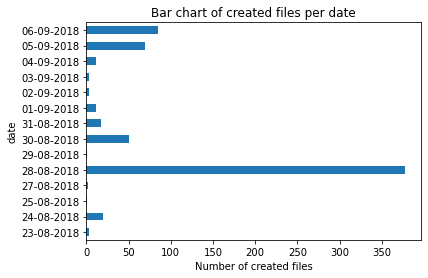

In [48]:
from collections import Counter

dates = Counter(created_files.date.apply(lambda x: x.strftime('%d-%m-%Y')) )
print(dates)
counts = dates
index = []
data = []

for k,v in counts.items():
    index.append(k)
    data.append(v)
ts = pd.Series(data, index)
figsize=(15, 10)
ts.plot(kind="barh", title="Bar chart of created files per date")
plt.xlabel('Number of created files')
plt.ylabel('date')






In [49]:
# lots of activity on the 28th
df[['date']]

check_date = "2018-08-28"
created_files[created_files['date']==check_date]


,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra,year,month,day
25481,2018-08-28,00:57:35,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/Quarantine/7e281b1439231a30.bup,c:/Quarantine/7e281b1439231a30.bup,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,80282,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,28
25537,2018-08-28,01:09:06,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/Quarantine/7e281b159610e0.bup,c:/Quarantine/7e281b159610e0.bup,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,80700,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,28
27221,2018-08-28,14:40:52,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/Windows/System32/SleepStudy/user-not-presen...,c:/Windows/System32/SleepStudy/user-not-presen...,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,113623,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,28
27371,2018-08-28,15:42:38,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/Users/spsql/Documents/20180828/PowerShell_t...,c:/Users/spsql/Documents/20180828/PowerShell_t...,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,179667,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,28
27852,2018-08-28,18:59:09,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/Users/spsql/Documents/20180828/PowerShell_t...,c:/Users/spsql/Documents/20180828/PowerShell_t...,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,107301,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48975,2018-08-28,23:11:02,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,193084,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,28
48976,2018-08-28,23:11:02,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,193085,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,28
48977,2018-08-28,23:11:02,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,193086,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,28
48979,2018-08-28,23:11:03,UTC,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,-,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,112011,-,mactime,md5: 0; mode_as_string: r/rrwxrwxrwx; sha256_h...,2018,8,28


In [50]:
created_files[['date']]

,date
1227,2018-08-23
1417,2018-08-23
1426,2018-08-23
7768,2018-08-24
7769,2018-08-24
...,...
182409,2018-09-06
182726,2018-09-06
182728,2018-09-06
183129,2018-09-06


In [51]:
df[['date','MACB', 'type']]

,date,MACB,type
0,2018-08-23,M...,Content Modification Time
1,2018-08-23,M...,Content Modification Time
2,2018-08-23,M...,Content Modification Time
3,2018-08-23,M...,Content Modification Time
4,2018-08-23,M...,Content Modification Time
...,...,...,...
185161,2018-09-06,M...,Content Modification Time
185162,2018-09-06,M...,Content Modification Time
185163,2018-09-06,M...,Content Modification Time
185164,2018-09-06,M...,Content Modification Time


In [52]:
df[['date','MACB', 'type']].groupby('MACB').count().sort_values("type", ascending=False)

,date,type
MACB,,
M...,170548,170548
..C.,5511,5511
.A..,4472,4472
....,998,998
...B,736,736
.A.B,724,724
MACB,654,654
M.C.,635,635
MA..,295,295


In [53]:
df[['date','MACB', 'type']].groupby('type').count().sort_values("MACB", ascending=False)

,date,MACB
type,,
Content Modification Time,170547,170547
Metadata Modification Time,5511,5511
Last Visited Time,3583,3583
Creation Time; Last Access Time,724,724
Last Access Time,688,688
Creation Time,686,686
Previous Last Time Executed,663,663
Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time,654,654
Content Modification Time; Metadata Modification Time,635,635


In [54]:
pd.set_option('display.max_colwidth',1000)# remove elipses to see filename

In [55]:
df.filename[df.type=='File Downloaded']

18716    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
18903    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
18953    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19633    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19762    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19773    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19774    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19775    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19785    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19800    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19805    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User Data\Default\History
19813    OS:E:\C\Users\tdungan\AppData\Local\Google\Chrome\User D

In [56]:
df.filename[df.type=='Launch time']

72161     OS:E:\C\Windows\system32\config\SOFTWARE
75686     OS:E:\C\Windows\system32\config\SOFTWARE
75708     OS:E:\C\Windows\system32\config\SOFTWARE
80374     OS:E:\C\Windows\system32\config\SOFTWARE
80379     OS:E:\C\Windows\system32\config\SOFTWARE
                            ...                   
182741    OS:E:\C\Windows\system32\config\SOFTWARE
183013    OS:E:\C\Windows\system32\config\SOFTWARE
183193    OS:E:\C\Windows\system32\config\SOFTWARE
183742    OS:E:\C\Windows\system32\config\SOFTWARE
184347    OS:E:\C\Windows\system32\config\SOFTWARE
Name: filename, Length: 76, dtype: object

In [57]:
df.dtypes

date          datetime64[ns]
time                  object
timezone              object
MACB                  object
source                object
sourcetype            object
type                  object
user                  object
host                  object
short                 object
desc                  object
version                int64
filename              object
inode                  int64
notes                 object
format                object
extra                 object
year                   int64
month                  int64
day                    int64
dtype: object

In [58]:
'''
From Seamus's slides
Timelining –Metadata, $MFT
Metadata details from Master File Table
• Timestamps associated with all files and directories, current and deleted
• All Files System types, NTFS, FAT, EXT, others
Timestamp metadata
M –Data content last modified
A –Data content last accessed
C –Metadata content changed on MFT
B –Metadata first created (Birth)
'''



"\nFrom Seamus's slides\nTimelining –Metadata, $MFT\nMetadata details from Master File Table\n• Timestamps associated with all files and directories, current and deleted\n• All Files System types, NTFS, FAT, EXT, others\nTimestamp metadata\nM –Data content last modified\nA –Data content last accessed\nC –Metadata content changed on MFT\nB –Metadata first created (Birth)\n"

In [59]:
df.groupby(df['type']).count()





,date,time,timezone,MACB,source,sourcetype,user,host,short,desc,version,filename,inode,notes,format,extra,year,month,day
type,,,,,,,,,,,,,,,,,,,
Content Deletion Time,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Content Modification Time,170547,170547,170547,170547,170547,170422,170547,170547,170547,170547,170547,170547,170547,170547,170547,170547,170547,170547,170547
Content Modification Time; Creation Time,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Content Modification Time; Creation Time; Last Access Time,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223
Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time,654,654,654,654,654,654,654,654,654,654,654,654,654,654,654,654,654,654,654
Content Modification Time; Last Access Time,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295
Content Modification Time; Last Access Time; Metadata Modification Time,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
Content Modification Time; Metadata Modification Time,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635
Creation Time,686,686,686,686,686,686,686,686,686,686,686,686,686,686,686,686,686,686,686


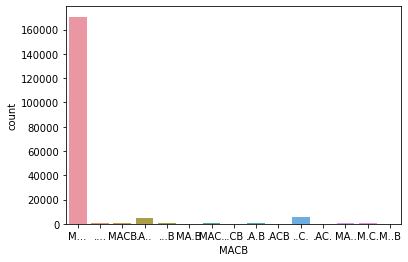

In [60]:
# plot 
ax = sns.countplot(x="MACB", data=df)

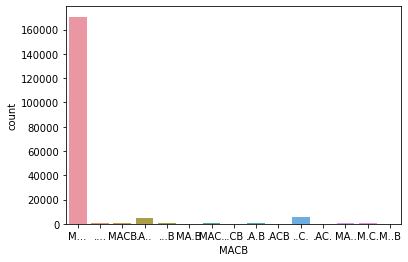

In [61]:
# plot 
ax = sns.countplot(x="MACB", data=df)


In [62]:
# most are M...? check this out with nulls?

<AxesSubplot:xlabel='MACB', ylabel='count'>

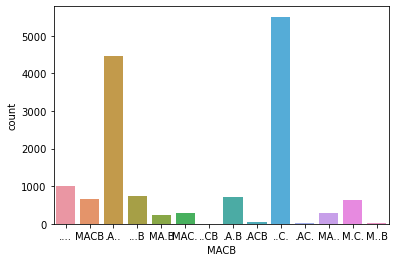

In [75]:
# drop M... to see what the others look look like
sns.countplot(data=df.loc[df['MACB']!="M..."], x='MACB')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Content Modification Time'),
  Text(1, 0, 'Expiration Time'),
  Text(2, 0, 'Previous Last Time Executed'),
  Text(3, 0, 'Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time'),
  Text(4, 0, 'File Last Modification Time'),
  Text(5, 0, 'Last Visited Time'),
  Text(6, 0, 'Creation Time'),
  Text(7, 0, 'Content Modification Time; Creation Time; Last Access Time'),
  Text(8, 0, 'Content Modification Time; Last Access Time; Metadata Modification Time'),
  Text(9, 0, 'Creation Time; Metadata Modification Time'),
  Text(10, 0, 'Creation Time; Last Access Time'),
  Text(11, 0, 'Creation Time; Last Access Time; Metadata Modification Time'),
  Text(12, 0, 'Metadata Modification Time'),
  Text(13, 0, 'Last Access Time; Metadata Modification Time'),
  Text(14, 0, 'Content Modification Time; Last Access Time'),
  Text(15, 0, 'Conte

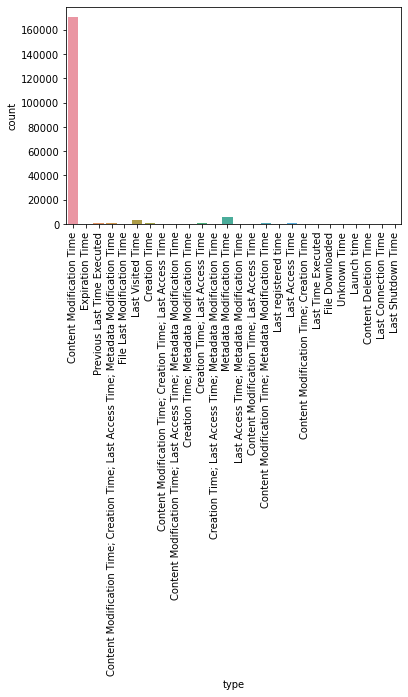

In [78]:
# drop M... to see what the others look look like
sns.countplot(data=df, x='type')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Expiration Time'),
  Text(1, 0, 'Previous Last Time Executed'),
  Text(2, 0, 'Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time'),
  Text(3, 0, 'File Last Modification Time'),
  Text(4, 0, 'Last Visited Time'),
  Text(5, 0, 'Creation Time'),
  Text(6, 0, 'Content Modification Time; Creation Time; Last Access Time'),
  Text(7, 0, 'Content Modification Time; Last Access Time; Metadata Modification Time'),
  Text(8, 0, 'Creation Time; Metadata Modification Time'),
  Text(9, 0, 'Creation Time; Last Access Time'),
  Text(10, 0, 'Creation Time; Last Access Time; Metadata Modification Time'),
  Text(11, 0, 'Metadata Modification Time'),
  Text(12, 0, 'Last Access Time; Metadata Modification Time'),
  Text(13, 0, 'Content Modification Time; Last Access Time'),
  Text(14, 0, 'Content Modification Time; Metadata Modification Time

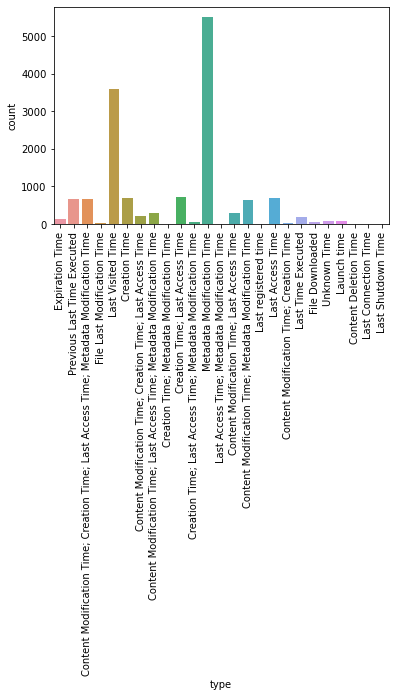

In [80]:
# drop M... to see what the others look look like
sns.countplot(data=df.loc[df['type']!="Content Modification Time"], x='type')
plt.xticks(rotation=90)


In [93]:

pd.set_option('display.max_row',1000)
df[df['type']=='Launch time']['short']

72161                                                          Task: appuriverifierinstall
75686                                                                         Task: WinSAT
75708                                                                    Task: VerifyWinRE
80374                                                               Task: Metadata Refresh
80379                                                                  Task: RegIdleBackup
120846                                                                      Task: LPRemove
120849                                               Task: File History (maintenance mode)
126447                                                                            Task: SR
148707    Task: OneDrive Standalone Update Task-S-1-5-21-3445421715-2530590580-31493089...
150135                                                 Task: ProcessMemoryDiagnosticEvents
150140                                                       Task: RunFullMemoryDiagnostic

<function matplotlib.pyplot.show(close=None, block=None)>

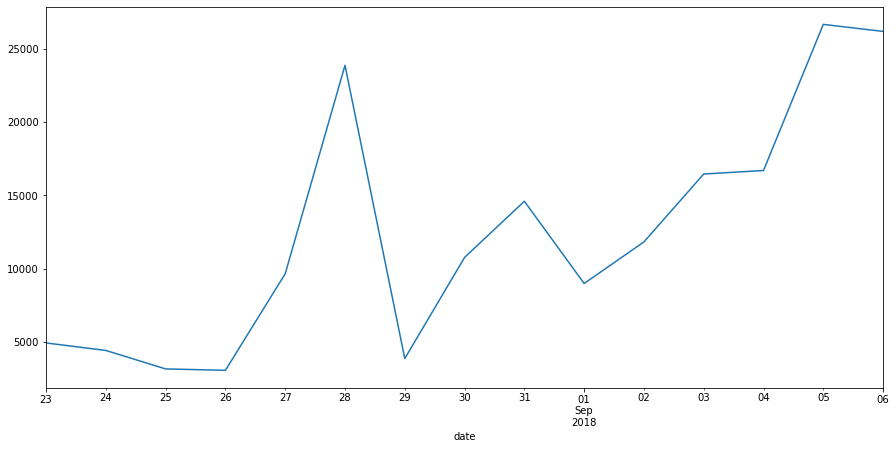

In [63]:
# plot 
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['date']).count()['type'].plot(ax=ax)
plt.show


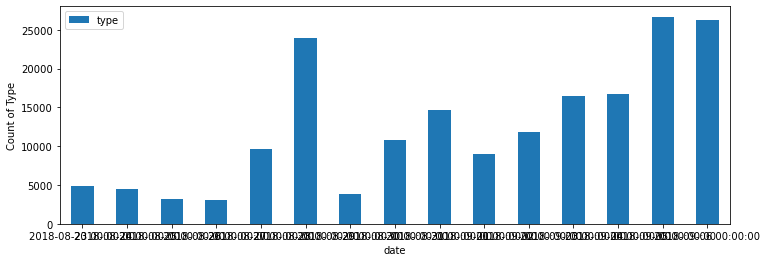

In [64]:
fig, axs = plt.subplots(figsize=(12, 4))

df.groupby(df["date"])["type"].count().plot(kind='bar', rot=0, ax=axs, legend=True)
plt.xlabel("date");  # custom x label using matplotlib
plt.ylabel("Count of Type");

![Picure](images/PosterSANS-1024x715.png)
